In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Minimalan broj boja: 3
Bojenje grafa: {'A': 0, 'B': 1, 'C': 2, 'D': 0}


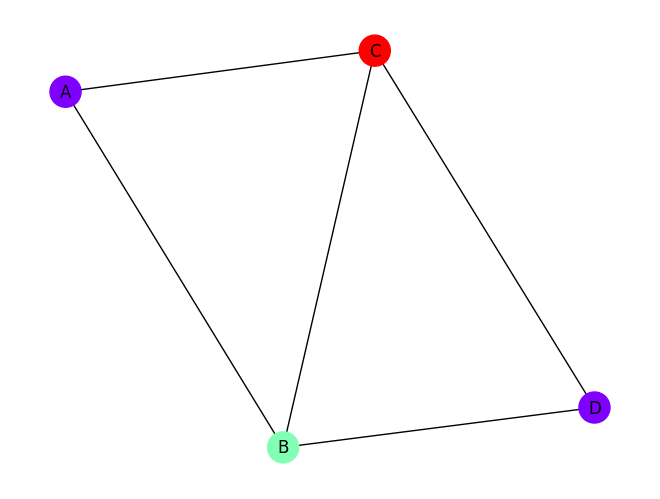

In [3]:
def brute_force_algorithm(graph):
    G = nx.Graph(graph)
    colors = {}  # Mapiranje boja za svaki čvor
    available_colors = set()  # Set dostupnih boja

    for node in G.nodes():
        # Pronalazak boja susednih čvorova
        neighbor_colors = {colors[neighbor] for neighbor in G.neighbors(node) if neighbor in colors}
        new_color = next((c for c in range(len(G)) if c not in neighbor_colors), len(G))  # Pronalazak nove boje

        colors[node] = new_color  # Bojenje čvora
        available_colors.add(new_color)  # Dodavanje boje u dostupne boje

    return len(available_colors), colors  # Vraćamo minimalan broj boja i mapiranje boja

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

# Poziv funkcije za minimalno bojenje grafa
min_colors, coloring = brute_force_algorithm(graph)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

Minimalan broj boja: 4
Bojenje grafa: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 0, 'F': 0, 'G': 1, 'H': 1, 'I': 2, 'J': 0}


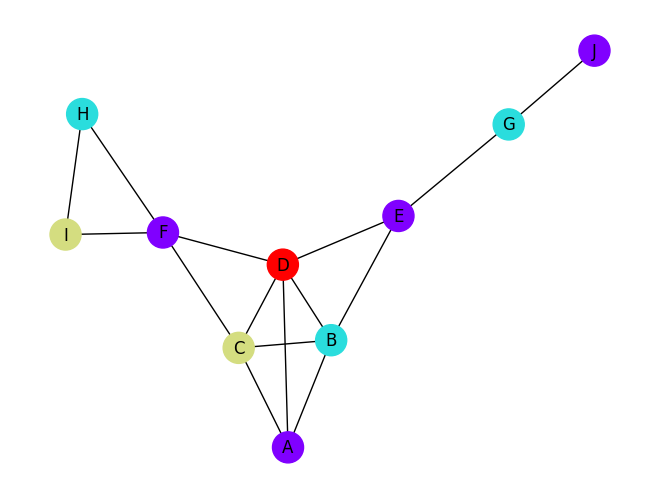

In [4]:
graph2 = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}
min_colors, coloring = brute_force_algorithm(graph2)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph2)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

Minimalno bojenje grafa: {'A': 1, 'B': 2, 'C': 3, 'D': 1}
Broj korišćenih boja: 3


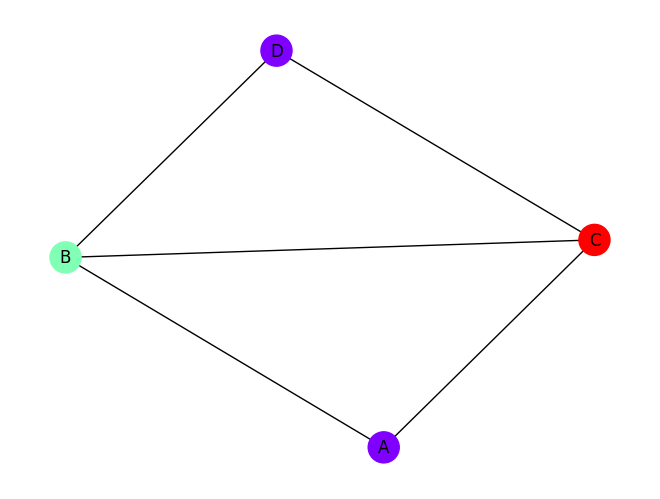

In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.colors = self.initial_coloring()
        self.fitness = self.calc_fitness()

    def initial_coloring(self):
        colors = {}
        available_colors = set()
        for node in self.graph:
            neighbor_colors = {colors[neighbor] for neighbor in self.graph[node] if neighbor in colors}
            color = 1
            while color in neighbor_colors:
                color += 1
            colors[node] = color
            available_colors.add(color)
        return colors

    def calc_fitness(self):
        conflicts = 0
        for node in self.graph:
            for neighbor in self.graph[node]:
                if self.colors[node] == self.colors[neighbor]:
                    conflicts += 1
        return conflicts

def crossover(parent1, parent2):
    child_colors = {}
    for node in parent1.colors:
        child_colors[node] = parent1.colors[node] if random.random() < 0.5 else parent2.colors[node]
    child = Individual(parent1.graph)
    child.colors = child_colors
    child.fitness = child.calc_fitness()
    return child

def mutation(individual):
    node = random.choice(list(individual.colors.keys()))
    neighbor_colors = {individual.colors[neighbor] for neighbor in individual.graph[node]}
    available_colors = set(range(1, len(individual.graph) + 1)) - neighbor_colors
    if available_colors:
        individual.colors[node] = random.choice(list(available_colors))
        individual.fitness = individual.calc_fitness()

def ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            if random.random() < mutation_prob:
                mutation(child)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = min(population, key=lambda x: x.fitness)
    return best_solution

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x.fitness)

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

# Vizualizacija rezultata bojenja grafa
G = nx.Graph(graph)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()


Minimalno bojenje grafa: {0: 1, 1: 2, 2: 1, 3: 3, 4: 1, 5: 2, 6: 3, 7: 1, 8: 3, 9: 1, 10: 4, 11: 5, 12: 2, 13: 4, 14: 6, 15: 3, 16: 5, 17: 5, 18: 2, 19: 7, 20: 7, 21: 4, 22: 8, 23: 9, 24: 4, 25: 9, 26: 6, 27: 5, 28: 9, 29: 8, 30: 4, 31: 3, 32: 6, 33: 7, 34: 8, 35: 10, 36: 10, 37: 9, 38: 11, 39: 9, 40: 10, 41: 4, 42: 10, 43: 11, 44: 11, 45: 5, 46: 2, 47: 5, 48: 12, 49: 12}
Broj korišćenih boja: 12


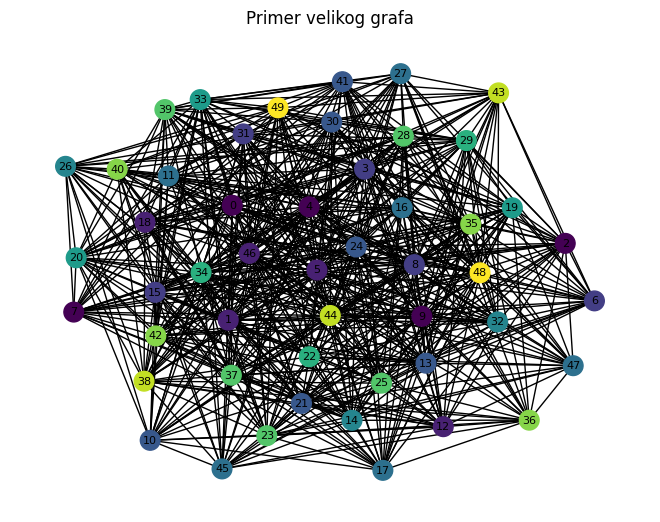

In [7]:
G = nx.erdos_renyi_graph(50,0.5)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

G = nx.Graph(G)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()

In [ ]:
G = nx.erdos_renyi_graph(5000,0.2)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()


In [11]:
import time

Execution time: 0.02043890953063965 seconds
Minimalan broj boja: 50
Bojenje grafa: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49}


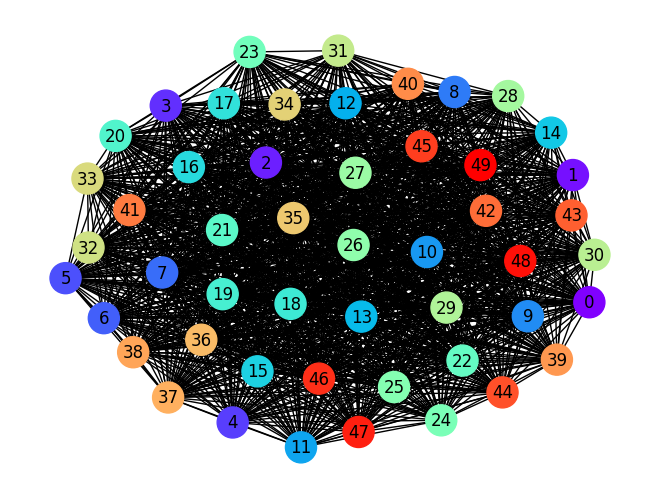

In [10]:
start_time = time.time()
min_colors, coloring = brute_force_algorithm(G)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

Execution time: 37.7187876701355 seconds
Minimalno bojenje grafa: {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50}
Broj korišćenih boja: 50


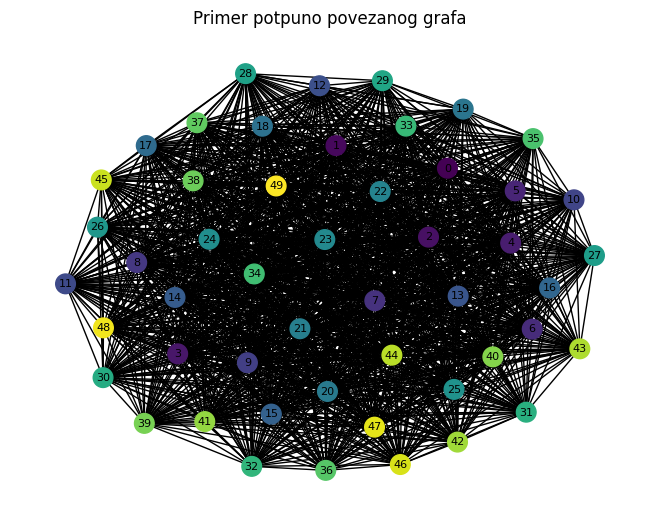

In [12]:
G = nx.complete_graph(50)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer potpuno povezanog grafa")
plt.show()